## Experiment 2
```
CNN(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (fc): Linear(in_features=23104, out_features=4, bias=True)
)
```

### Accuracy: 85.98771266540643 %

In [1]:
#!pip uninstall -y numpy
#!pip install --force-reinstall numpy==1.19.3

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import utils

In [3]:
dataset_dir = os.path.abspath('dataset_kagle/COVID-19_Radiography_Dataset')
dest_dir = os.path.abspath('dataset')

train_dir, test_dir, val_dir = utils.split_dataset(dataset_dir, dest_dir, test_ratio=0.2, val_ratio=0.1)

Ya existen datos de train, test y val.


In [4]:
batch_size = 64

train_set =  torchvision.datasets.ImageFolder(train_dir, transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, pin_memory=True)
print(train_set)

test_set =  torchvision.datasets.ImageFolder(test_dir, transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True, pin_memory=True)
print(test_set)

Dataset ImageFolder
    Number of datapoints: 14814
    Root location: /Users/allen/Documents/Msc/Semestre II/Aprendizaje Automatico/proyecto3/dataset/train
    StandardTransform
Transform: ToTensor()
Dataset ImageFolder
    Number of datapoints: 4232
    Root location: /Users/allen/Documents/Msc/Semestre II/Aprendizaje Automatico/proyecto3/dataset/test
    StandardTransform
Transform: ToTensor()


In [5]:
tensor_img, label_idx = train_set[0]
#utils.show_img(tensor_img, train_set.classes[label_idx])

### Capa 1:

In [9]:
print('****************** Info Layer 1 **************************')
layer1_in_channels, layer1_img_width, layer1_img_height = tensor_img.shape
print("Dimensiones de entrada:", layer1_img_width, "x", layer1_img_height)
print("Número de canales de entrada:", layer1_in_channels)

layer1_num_filters = 32
print("Número de filtros:", layer1_num_filters)

layer1_kernel_size = 3
print("Dimensiones del kernel:", layer1_kernel_size, "x", layer1_kernel_size)

layer1_stride = 2
print("Tamaño de Stride:", layer1_stride)

layer1_padding = 1
print("Tamaño de Padding:", layer1_padding)

layer1_out_size = utils.size_output_layer(layer1_img_width, layer1_kernel_size, layer1_stride, layer1_padding)
print("Dimensiones de salida:", layer1_out_size, "x", layer1_out_size)

layer1_output_dim = utils.size_output_layer(layer1_out_size, 2, 2, 0)
print("Dimensiones luego del MaxPool2d:", layer1_output_dim)

****************** Info Layer 1 **************************
Dimensiones de entrada: 299 x 299
Número de canales de entrada: 3
Número de filtros: 32
Dimensiones del kernel: 3 x 3
Tamaño de Stride: 2
Tamaño de Padding: 1
Dimensiones de salida: 150 x 150
Dimensiones luego del MaxPool2d: 75


In [8]:
layer1_conv = nn.Conv2d(
        layer1_in_channels,
        layer1_num_filters,
        layer1_kernel_size,
        layer1_stride,
        layer1_padding
)

### Capa 2

In [10]:
print('****************** Info Layer 2 **************************')
layer2_in_channels, layer2_img_width, layer2_img_height = layer1_num_filters, layer1_output_dim, layer1_output_dim
print("Dimensiones de entrada:", layer2_img_width, "x", layer2_img_height)
print("Número de canales de entrada:", layer2_in_channels)

layer2_num_filters = 64
print("Número de filtros:", layer2_num_filters)

layer2_kernel_size = 2
print("Dimensiones del kernel:", layer2_kernel_size, "x", layer2_kernel_size)

layer2_stride = 2
print("Tamaño de Stride:", layer2_stride)

layer2_padding = 1
print("Tamaño de Padding:", layer2_padding)

layer2_out_size = utils.size_output_layer(layer2_img_width, layer2_kernel_size, layer2_stride, layer2_padding)
print("Dimensiones de salida:", layer2_out_size, "x", layer2_out_size)

layer2_output_dim = utils.size_output_layer(layer2_out_size, 2, 2, 0)
print("Dimensiones luego del MaxPool2d:", layer2_output_dim)

****************** Info Layer 2 **************************
Dimensiones de entrada: 75 x 75
Número de canales de entrada: 32
Número de filtros: 64
Dimensiones del kernel: 2 x 2
Tamaño de Stride: 2
Tamaño de Padding: 1
Dimensiones de salida: 38 x 38
Dimensiones luego del MaxPool2d: 19


In [11]:
layer2_conv = nn.Conv2d(
        layer2_in_channels,
        layer2_num_filters,
        layer2_kernel_size,
        layer2_stride,
        layer2_padding
)

### Model

In [12]:
# Layer 1: Convolutional layer
layer1 = nn.Sequential(
    layer1_conv,
    nn.ReLU(),
    nn.BatchNorm2d(layer1_num_filters),
    nn.MaxPool2d(kernel_size=2, stride=2)
)
print(layer1)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [13]:
# Layer 2: Convolutional layer
layer2 = nn.Sequential(
    layer2_conv,
    nn.ReLU(),
    nn.BatchNorm2d(layer2_num_filters),
    nn.MaxPool2d(kernel_size=2, stride=2)
)
print(layer2)

Sequential(
  (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [15]:
# Layer 3: Linear Classifier
num_classes = 4
classifier = nn.Linear(
    in_features=layer2_output_dim * layer2_output_dim * layer2_num_filters,
    out_features=num_classes
)
print(classifier)

Linear(in_features=23104, out_features=4, bias=True)


In [16]:
model = utils.CNN()

model.addLayer(layer1)
model.addLayer(layer2)

model.addClassifier(classifier)

print(model)

# Optimizer
learning_rate =  0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


CNN(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (fc): Linear(in_features=23104, out_features=4, bias=True)
)


### Training

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
list_loss= []
list_time = []
j=0
total_steps = len(train_loader)

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward 
        output = model(images)
        loss = loss_fn(output, labels)

        # change the params
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        list_loss.append(loss.item())
        list_time.append(j)
        j+=1

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_steps, loss.item()))

Device: cuda
Epoch [1/10], Step [100/232], Loss: 0.9947
Epoch [1/10], Step [200/232], Loss: 0.4032
Epoch [2/10], Step [100/232], Loss: 0.6279
Epoch [2/10], Step [200/232], Loss: 0.4552
Epoch [3/10], Step [100/232], Loss: 0.6650
Epoch [3/10], Step [200/232], Loss: 0.5341
Epoch [4/10], Step [100/232], Loss: 0.1886
Epoch [4/10], Step [200/232], Loss: 0.2524
Epoch [5/10], Step [100/232], Loss: 0.2095
Epoch [5/10], Step [200/232], Loss: 0.1693
Epoch [6/10], Step [100/232], Loss: 0.1190
Epoch [6/10], Step [200/232], Loss: 0.3031
Epoch [7/10], Step [100/232], Loss: 0.2418
Epoch [7/10], Step [200/232], Loss: 0.2529
Epoch [8/10], Step [100/232], Loss: 0.1437
Epoch [8/10], Step [200/232], Loss: 0.0365
Epoch [9/10], Step [100/232], Loss: 0.3091
Epoch [9/10], Step [200/232], Loss: 0.1394
Epoch [10/10], Step [100/232], Loss: 0.1266
Epoch [10/10], Step [200/232], Loss: 0.1228


In [23]:
# for param in model.parameters():
#     print(param)

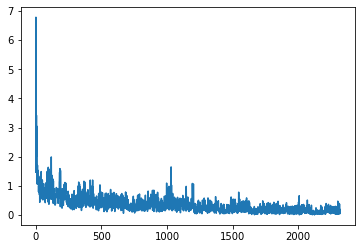

In [24]:
plt.plot(list_loss)

In [25]:
with torch.no_grad():
    correct = 0
    total = 0
    for t_images, t_labels in test_loader:
        t_images = t_images.to(device)
        t_labels = t_labels.to(device)
        t_outputs = model(t_images)
        _, predicted = torch.max(t_outputs.data, 1)
        total += t_labels.size(0)
        correct += (predicted == t_labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 85.98771266540643 %
